In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
import yfinance as yf
import mplfinance as mpf
from pandas_datareader import data as pdr

In [2]:
tickers = ['BTC-USD', 'ETH-USD']
start = '2016-01-01'
end = '2024-08-15'

df = yf.download(tickers, start=start, end = end)

[*********************100%%**********************]  2 of 2 completed


In [3]:
adj_close = df['Adj Close']
adj_close = adj_close.ffill()

In [4]:
fig = go.Figure()

for ticker in tickers:
    fig.add_trace(go.Scatter(x = adj_close.index, y=adj_close[ticker], mode = 'lines', name = ticker))

fig.update_layout(
    title = 'Crypto Historical Price',
    xaxis_title = 'Date',
    yaxis_title = 'Price',
    legend_title = 'Tickers',
    template = 'plotly_white',
    width = 1200,
    height = 800
)

fig.show()

In [5]:
interest_rates = pdr.get_data_fred('FEDFUNDS', start=start, end=end).ffill()
cpi = pdr.get_data_fred('CPIAUCSL', start = start, end = end).ffill()
unemployment_rate = pdr.get_data_fred('UNRATE', start = start, end = end).ffill()
gdp = pdr.get_data_fred('GDP', start = start, end = end).ffill()

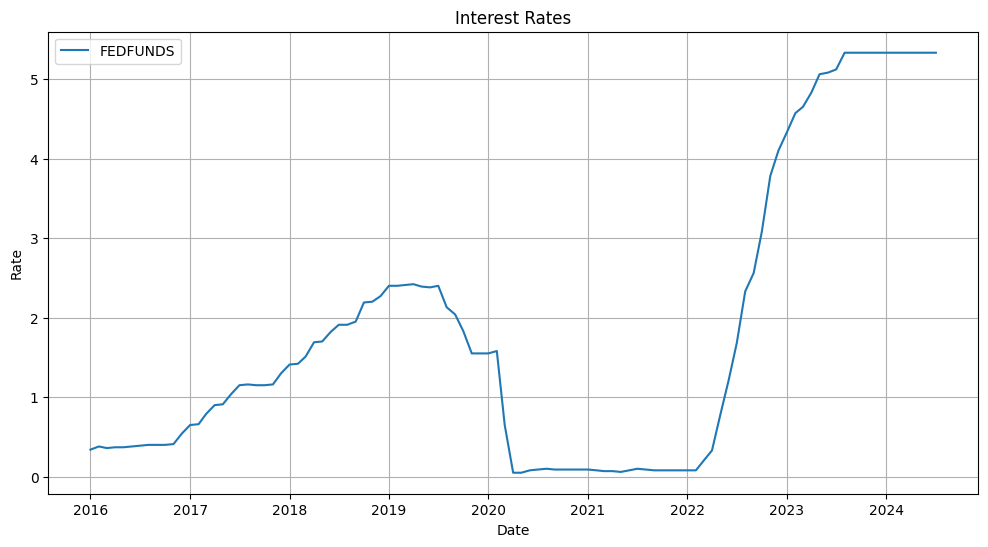

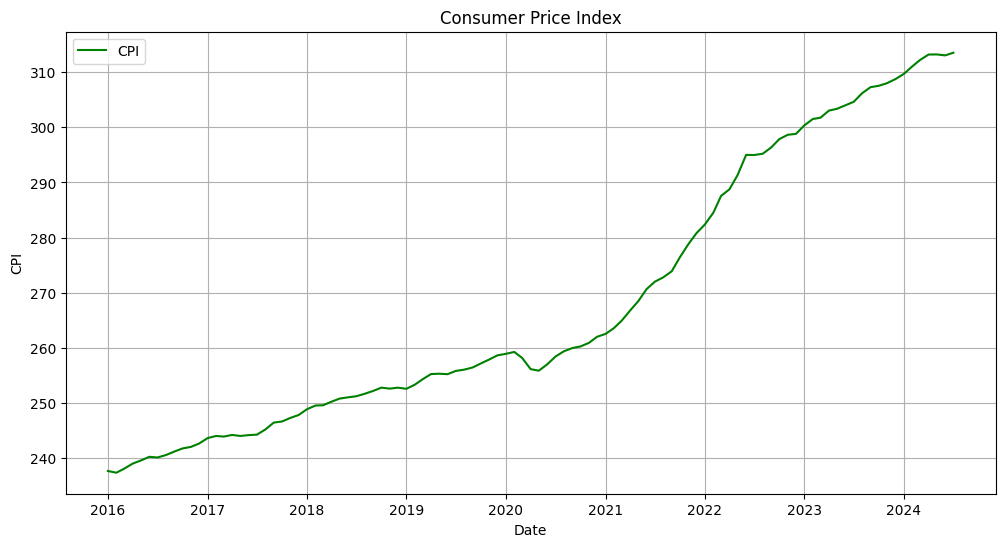

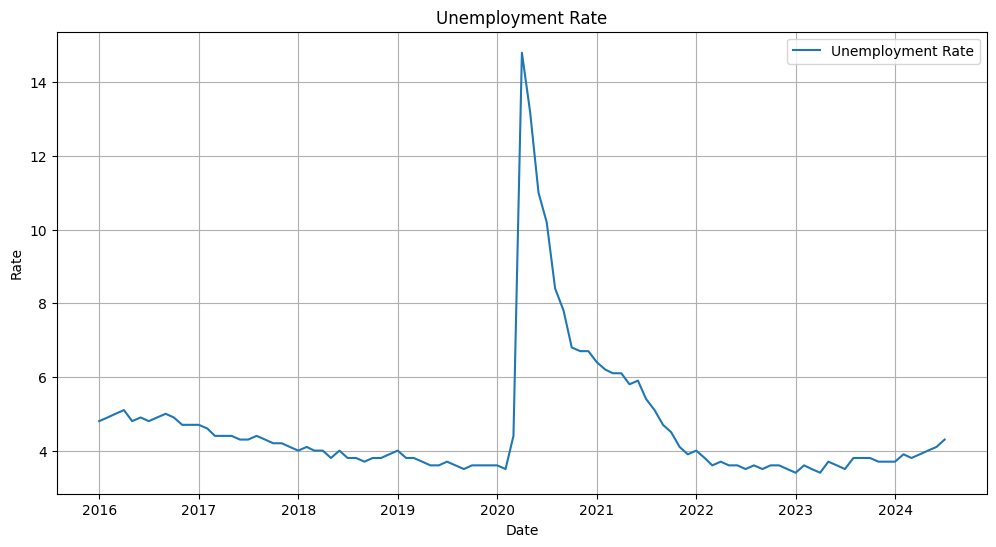

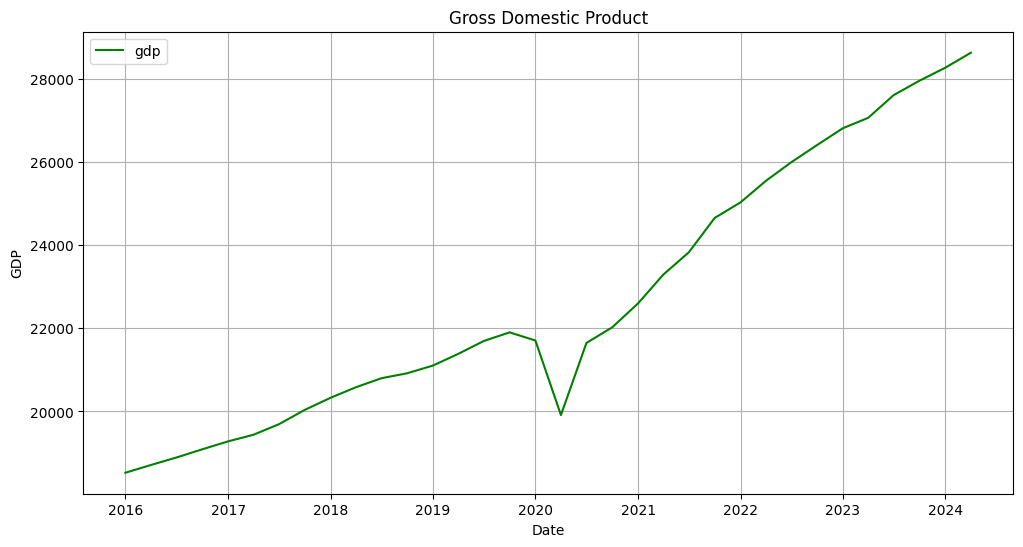

In [6]:
plt.figure(figsize = (12, 6))
plt.plot(interest_rates, label = 'FEDFUNDS')
plt.title('Interest Rates')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.grid()

plt.figure(figsize = (12, 6))
plt.plot(cpi, label = 'CPI', color = 'green')
plt.title('Consumer Price Index')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.grid()

plt.figure(figsize = (12, 6))
plt.plot(unemployment_rate, label = 'Unemployment Rate')
plt.title('Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.grid()


plt.figure(figsize = (12,6))
plt.plot(gdp, label = 'gdp', color = 'green')
plt.title('Gross Domestic Product')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
plt.grid()

<Axes: title={'center': 'Stocks & Economic Indicators Correlation Matrix'}, xlabel='Ticker', ylabel='Ticker'>

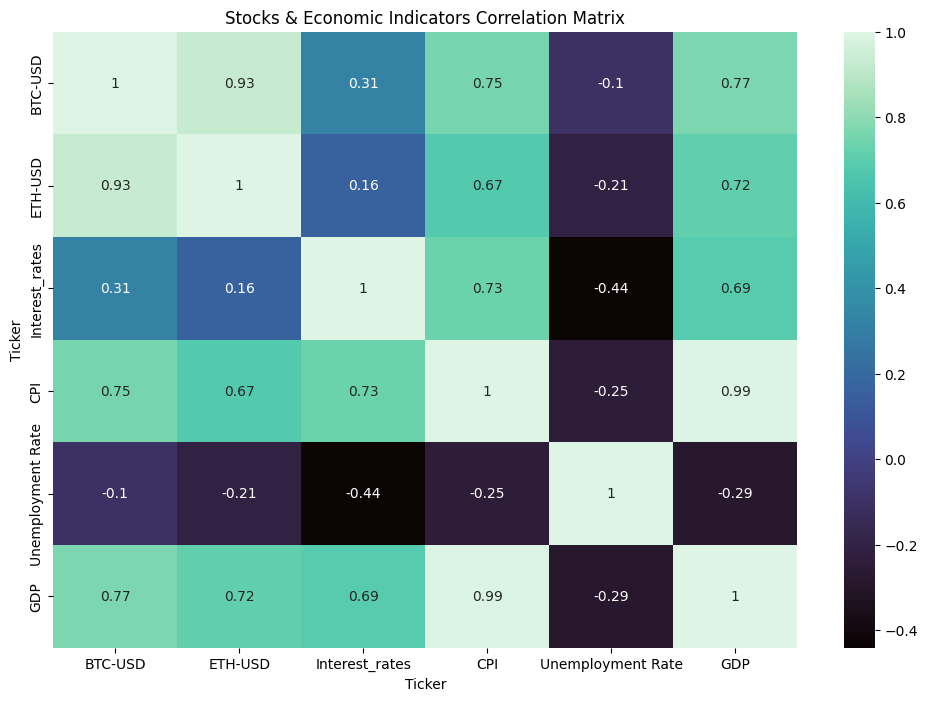

In [7]:
# correlation matrix with economic indicators

merged_df = adj_close.copy()
merged_df['Interest_rates'] = interest_rates['FEDFUNDS']
merged_df['CPI'] = cpi['CPIAUCSL']
merged_df['Unemployment Rate'] = unemployment_rate['UNRATE']
merged_df['GDP'] = gdp['GDP']

corr_matrix = merged_df.corr()

plt.figure(figsize = (12,8))
plt.title('Stocks & Economic Indicators Correlation Matrix')
sns.heatmap(corr_matrix, annot = True, cmap = 'mako')

BTC-USD with Economic Indicators: 

1. GDP (0.77):
Moderate to Strong Positive Correlation: Bitcoin has a moderate to strong positive correlation with GDP. This suggests that as the economy grows (indicated by a higher GDP), Bitcoin's price tends to increase. A growing economy might lead to more disposable income and higher investment in cryptocurrencies, boosting Bitcoin's price.

2. CPI (0.75):
Moderate Positive Correlation: There is a moderate positive correlation between Bitcoin and the Consumer Price Index (CPI), which measures inflation. This suggests that as inflation rises (indicated by a higher CPI), Bitcoin's price tends to increase. This could be because investors view Bitcoin as a hedge against inflation, moving their funds into cryptocurrencies when they anticipate higher inflation, thus driving up prices.
Interest Rates 

3. Interest Rates(0.31):
Weak Positive Correlation: Bitcoin shows a weak positive correlation with interest rates. This implies that there is a slight tendency for Bitcoin prices to rise when interest rates increase, although the relationship is not strong. The weak correlation could be due to the fact that while rising interest rates generally reduce the appeal of riskier assets (like Bitcoin), they may also signal economic conditions that drive more speculative investment into cryptocurrencies.

4. Unemployment Rate (-0.1):
Weak Negative Correlation: The correlation between Bitcoin and the unemployment rate is weak and negative, indicating that when unemployment rises, Bitcoin tends to decrease slightly. This could be because higher unemployment often signals economic downturns, during which investors may prefer to reduce exposure to volatile assets like Bitcoin.
GDP 